In [7]:
import pandas as pd
import matplotlib.pyplot as plt
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [8]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# Task 4: Generate Descriptive Statistics and Visualizations

## For the "Median value of owner-occupied homes" provide a boxplot

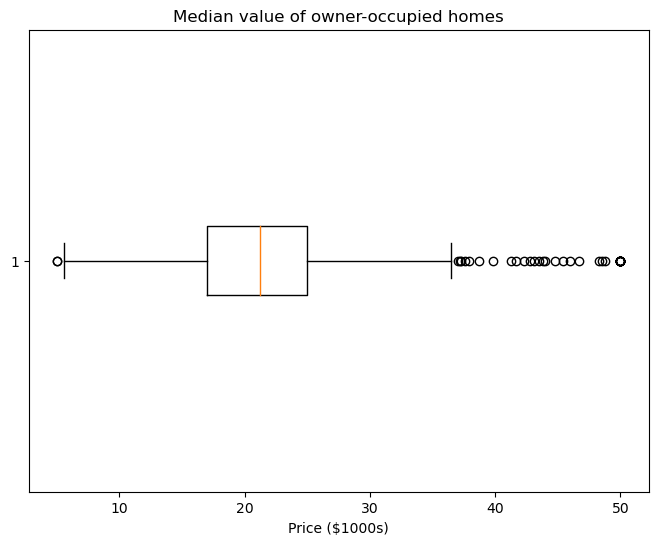

In [16]:
# Boxplot for median value of owner-occupied homes
plt.figure(figsize=(8,6))
plt.boxplot(boston_df['MEDV'], vert=False)
plt.title('Median value of owner-occupied homes')
plt.xlabel('Price ($1000s)')
plt.show()


## Provide a  bar plot for the Charles river variable

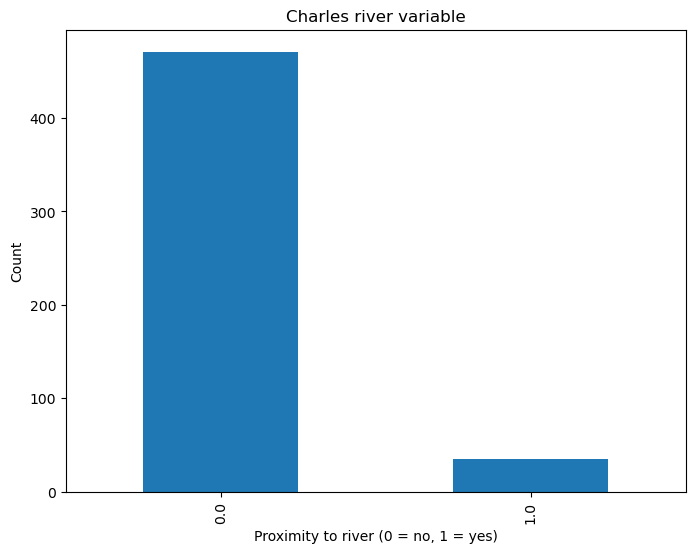

In [17]:
# Bar plot for Charles river variable
plt.figure(figsize=(8,6))
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title('Charles river variable')
plt.xlabel('Proximity to river (0 = no, 1 = yes)')
plt.ylabel('Count')
plt.show()

## Provide a boxplot for the MEDV variable vs the AGE variable.  
## (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

<Figure size 800x600 with 0 Axes>

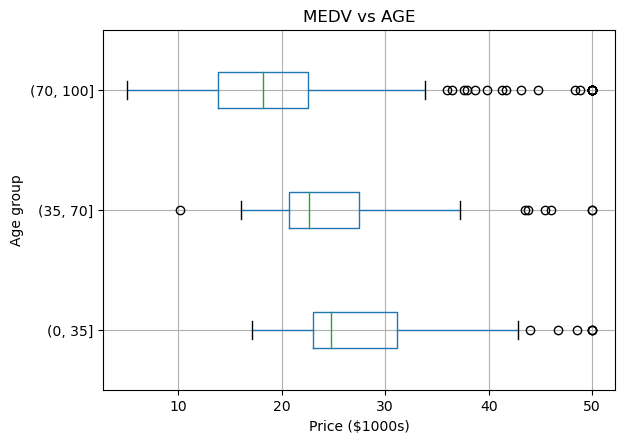

In [11]:
# Boxplot for MEDV vs AGE
plt.figure(figsize=(8,6))
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100])
boston_df.boxplot(column='MEDV', by='age_group', vert=False)
plt.title('MEDV vs AGE')
plt.xlabel('Price ($1000s)')
plt.ylabel('Age group')
plt.suptitle("")
plt.show()
boston_df.drop('age_group', axis=1, inplace=True)

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

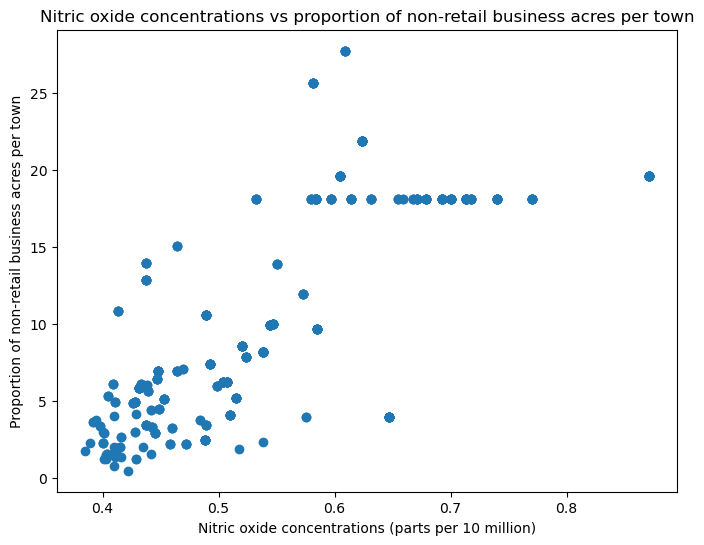

In [18]:
# Scatter plot for Nitric oxide concentrations vs proportion of non-retail business acres per town
plt.figure(figsize=(8,6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'])
plt.title('Nitric oxide concentrations vs proportion of non-retail business acres per town')
plt.xlabel('Nitric oxide concentrations (parts per 10 million)')
plt.ylabel('Proportion of non-retail business acres per town')
plt.show()

##     Create a histogram for the pupil to teacher ratio variable

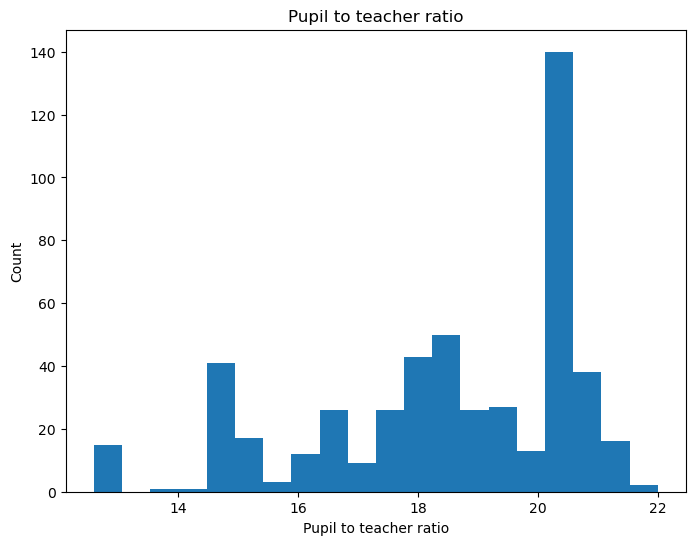

In [19]:
# Histogram for pupil to teacher ratio variable
plt.figure(figsize=(8,6))
plt.hist(boston_df['PTRATIO'], bins=20)
plt.title('Pupil to teacher ratio')
plt.xlabel('Pupil to teacher ratio')
plt.ylabel('Count')
plt.show()

In [21]:
from scipy.stats import ttest_ind

# Split data into two groups based on CHAS variable
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Calculate t-test statistic and p-value
t_stat, p_val = ttest_ind(chas_0, chas_1)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_val}")

# Determine statistical significance
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles river.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in median value of houses bounded by the Charles river.")



t-statistic: -3.996437466090509
p-value: 7.390623170519905e-05
Reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles river.


In [25]:
from scipy.stats import f_oneway

# Group data based on age group
age_groups = []
for group in boston_df['AGE'].unique():
    age_groups.append(boston_df[boston_df['AGE'] == group]['MEDV'])

# Calculate ANOVA statistic and p-value
f_stat, p_val = f_oneway(*age_groups)

print(f"F-statistic: {f_stat}")
print(f"p-value: {p_val}")

# Determine statistical significance
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis. There is a significant difference in median values of houses for each proportion of owner occupied units built prior to 1940.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in median values of houses for each proportion of owner occupied units built prior to 1940.")


F-statistic: 0.9840091646131573
p-value: 0.5539698276810093
Fail to reject the null hypothesis. There is no significant difference in median values of houses for each proportion of owner occupied units built prior to 1940.
